# Footbar Data Scientist

## Pre-processing and Data analysis

In [2]:
import pandas as pd 
import numpy as np 
from pathlib import Path
home = Path.home()
print(home)
base_path = Path(home, "Téléchargements", "Use_Case_Footbar")
print(base_path)

/home/idrassa
/home/idrassa/Téléchargements/Use_Case_Footbar


In [3]:
import os
# Upload datasets

Filepath1= str(base_path / "match_1")
Filepath2= str(base_path / "match_2")

def open_file_as_dataframe(file_path_without_extension):
    # Try opening as JSON
    json_path = file_path_without_extension + '.json'
    if os.path.exists(json_path):
        try:
            df = pd.read_json(json_path)
            return df
        except pd.errors.JSONDecodeError:
            pass  # Not a JSON file

    # Try opening as CSV
    csv_path = file_path_without_extension + '.csv'
    if os.path.exists(csv_path):
        try:
            df = pd.read_csv(csv_path)
            return df
        except pd.errors.EmptyDataError:
            pass  # CSV file is empty

    # If neither JSON nor CSV, return None
    return None

#match1_df=pd.read_csv(str(base_path / "match_1.csv"))

match1_df=open_file_as_dataframe(Filepath1)
match2_df=open_file_as_dataframe(Filepath2)

In [4]:
print(match1_df.shape)
print(match2_df.shape)

(574, 2)
(613, 2)


In [5]:
match1_df.dtypes

label    object
norm     object
dtype: object

In [6]:
match1_df.head(10)

,label,norm
0,walk,"[23.177037336396975, 23.361525285249378, 21.53..."
1,walk,"[20.998214383911275, 19.182798059840767, 18.27..."
2,walk,"[21.95259682019565, 20.62720484424047, 22.5554..."
3,walk,"[19.39209748358647, 19.30460665293087, 18.9787..."
4,rest,"[22.069263037713093, 19.672270483203395, 19.88..."
5,walk,"[19.92032356700904, 19.672270483203395, 18.688..."
6,walk,"[72.43782600710844, 29.1545534760874, 51.00451..."
7,walk,"[56.86645792611747, 24.06617147011633, 39.4051..."
8,run,"[34.587473483674074, 33.423278993730264, 21.71..."
9,run,"[10.642204698384765, 27.15560347765402, 40.427..."


In [7]:
match2_df.head(10)

,label,norm
0,no action,"[104.42423889328715, 87.63989343949717, 128.52..."
1,run,"[108.03112639951678, 92.57566083451651, 81.303..."
2,pass,"[17.837163554142162, 39.435455203974186, 51.64..."
3,rest,"[21.91843920469922, 18.11914155706377, 21.7137..."
4,walk,"[20.86063916182152, 17.8097748446304, 14.35537..."
5,run,"[49.812428381775, 48.79010014640253, 49.324534..."
6,run,"[15.648260272255667, 66.52107737294585, 55.285..."
7,run,"[161.87013179947397, 50.15025698062749, 45.705..."
8,run,"[56.43391333209642, 55.40403998476187, 33.5163..."
9,run,"[59.72417426637023, 70.76862146426512, 53.7987..."


In [8]:
max_norm_size1 = match1_df['norm'].apply(len).max()
max_norm_size2 = match2_df['norm'].apply(len).max()
min_norm_size1 = match1_df['norm'].apply(len).min()
min_norm_size2 = match2_df['norm'].apply(len).min()


# Find and print the largest list
largest_list_index = match1_df['norm'].apply(len).idxmax()
largest_list = match1_df.at[largest_list_index, 'norm']
row = match1_df.loc[largest_list_index]

print(max_norm_size1, max_norm_size2, min_norm_size1, min_norm_size2)

#print(f"The largest list is: {largest_list}")
print("Max norm is",row)

227 723 1 3
Max norm is label                                                 rest
norm     [36.508445455791104, 33.538318749948246, 28.43...
Name: 422, dtype: object


In [9]:
# Let's check for null cells in the dataframe
match1_df.isnull().sum()

label    0
norm     0
dtype: int64

In [10]:
# Let's look at the different action in a match
print(match1_df["label"].unique())
print(match2_df["label"].unique())

['walk' 'rest' 'run' 'tackle' 'dribble' 'pass' 'cross' 'shot']
['no action' 'run' 'pass' 'rest' 'walk' 'dribble' 'shot' 'tackle' 'cross']


In [11]:
# But do we have more than four successive shot in match1 because it's pratically impossible to have that many successive shot in a match?

def has_successive_shots(data_frame):
    shots_count = 0
    last_value = None
    
    for value in data_frame['label']:
        if value == 'shot':
            if last_value == 'shot':
                shots_count += 1
        last_value = value
    
    return shots_count > 4

if has_successive_shots(match1_df):
    print("There are more than four successive shots.")
else:
    print("There aren't more than four successive shots.")

There aren't more than four successive shots.


In [12]:
#Let's transform the norm column in a single value with represent the Mean and the Median of all the value in a the norm

import numpy as np

# Define the metric to use (mean, median, std)
med = np.median  # Replace with the desired metric function
mea = np.mean   # Replace with the desired metric function

match1_df['Mean_norm'] = match1_df['norm'].apply(mea)
match1_df['Median_norm'] = match1_df['norm'].apply(med)

match2_df['Mean_norm'] = match2_df['norm'].apply(mea)
match2_df['Median_norm'] = match2_df['norm'].apply(med)

In [13]:
match1_df.head(20)

,label,norm,Mean_norm,Median_norm
0,walk,"[23.177037336396975, 23.361525285249378, 21.53...",24.166958,22.417711
1,walk,"[20.998214383911275, 19.182798059840767, 18.27...",26.026276,22.864346
2,walk,"[21.95259682019565, 20.62720484424047, 22.5554...",23.998177,21.584619
3,walk,"[19.39209748358647, 19.30460665293087, 18.9787...",22.596573,20.998214
4,rest,"[22.069263037713093, 19.672270483203395, 19.88...",20.378778,20.509409
5,walk,"[19.92032356700904, 19.672270483203395, 18.688...",28.237656,22.166468
6,walk,"[72.43782600710844, 29.1545534760874, 51.00451...",26.561989,23.415829
7,walk,"[56.86645792611747, 24.06617147011633, 39.4051...",25.081731,24.098813
8,run,"[34.587473483674074, 33.423278993730264, 21.71...",30.745144,26.259087
9,run,"[10.642204698384765, 27.15560347765402, 40.427...",43.360407,35.184236


In [14]:
#Let's try to make a Clustering to see how the actions (labels) are arranged between them 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Create the feature matrix
feature_matrix_mean = np.array(match1_df['Mean_norm']).reshape(-1, 1)
feature_matrix_med = np.array(match1_df['Median_norm']).reshape(-1, 1)

# Perform K-Means clustering
num_clusters = 8  # Number of clusters to find
kmeans = KMeans(n_clusters=num_clusters)
match1_df['cluster_mean'] = kmeans.fit_predict(feature_matrix_mean)
match1_df['cluster_med'] = kmeans.fit_predict(feature_matrix_med)

/home/idrassa/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/idrassa/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
# Create the feature matrix match 2
feature_matrix_mean2 = np.array(match2_df['Mean_norm']).reshape(-1, 1)
feature_matrix_med2 = np.array(match2_df['Median_norm']).reshape(-1, 1)

# Perform K-Means clustering
num_clusters2 = 9  # Number of clusters to find
kmeans = KMeans(n_clusters=num_clusters)
match2_df['cluster_mean'] = kmeans.fit_predict(feature_matrix_mean2)
match2_df['cluster_med'] = kmeans.fit_predict(feature_matrix_med2)

/home/idrassa/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/idrassa/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
match1_df.head(20)

,label,norm,Mean_norm,Median_norm,cluster_mean,cluster_med
0,walk,"[23.177037336396975, 23.361525285249378, 21.53...",24.166958,22.417711,5,5
1,walk,"[20.998214383911275, 19.182798059840767, 18.27...",26.026276,22.864346,5,5
2,walk,"[21.95259682019565, 20.62720484424047, 22.5554...",23.998177,21.584619,5,5
3,walk,"[19.39209748358647, 19.30460665293087, 18.9787...",22.596573,20.998214,5,5
4,rest,"[22.069263037713093, 19.672270483203395, 19.88...",20.378778,20.509409,5,5
5,walk,"[19.92032356700904, 19.672270483203395, 18.688...",28.237656,22.166468,5,5
6,walk,"[72.43782600710844, 29.1545534760874, 51.00451...",26.561989,23.415829,5,5
7,walk,"[56.86645792611747, 24.06617147011633, 39.4051...",25.081731,24.098813,5,5
8,run,"[34.587473483674074, 33.423278993730264, 21.71...",30.745144,26.259087,0,1
9,run,"[10.642204698384765, 27.15560347765402, 40.427...",43.360407,35.184236,3,4


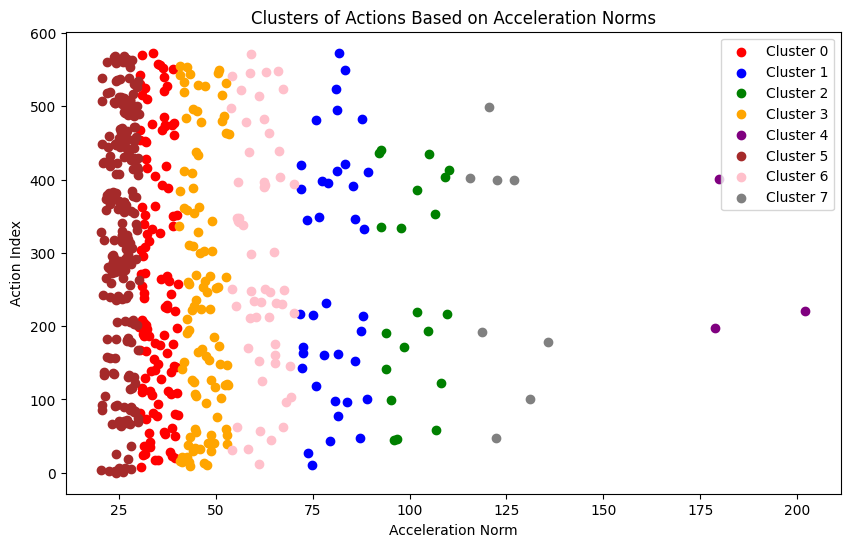

In [17]:
# Create scatter plot match 1
plt.figure(figsize=(10, 6))
colors =  ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan']
for i in range(num_clusters):
    cluster_data = match1_df[match1_df['cluster_mean'] == i]
    plt.scatter(cluster_data['Mean_norm'], cluster_data.index, color=colors[i], label=f'Cluster {i}')
    
plt.xlabel('Acceleration Norm')
plt.ylabel('Action Index')
plt.title('Clusters of Actions Based on Acceleration Norms')
plt.legend()
plt.show()

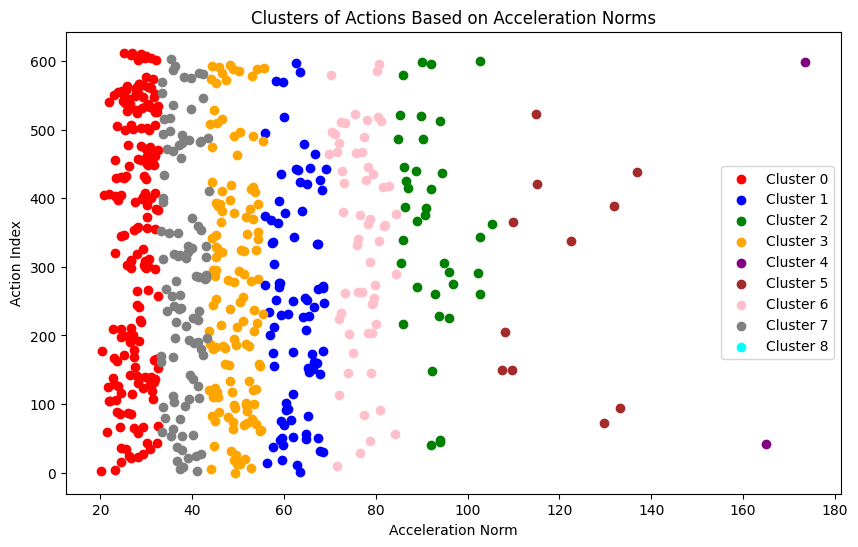

In [18]:
# Create scatter plot match 2
plt.figure(figsize=(10, 6))
colors =  ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan']
for i in range(num_clusters2):
    cluster_data = match2_df[match2_df['cluster_mean'] == i]
    plt.scatter(cluster_data['Mean_norm'], cluster_data.index, color=colors[i], label=f'Cluster {i}')
    
plt.xlabel('Acceleration Norm')
plt.ylabel('Action Index')
plt.title('Clusters of Actions Based on Acceleration Norms')
plt.legend()
plt.show()

In [19]:
import joblib
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(match2_df['label'])


y1=label_encoder.transform(match1_df['label'])
y2=label_encoder.transform(match2_df['label'])


# Save the label_encoder to a file
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [20]:
y2.dtype

dtype('int64')

In [21]:
#Drop column that we won't use
match1_df=match1_df.drop('label',axis=1)
match1_df=match1_df.drop('norm',axis=1)
match1_df=match1_df.drop('cluster_mean',axis=1)
match1_df=match1_df.drop('cluster_med',axis=1)

match2_df=match2_df.drop('label',axis=1)
match2_df=match2_df.drop('norm',axis=1)
match2_df=match2_df.drop('cluster_mean',axis=1)
match2_df=match2_df.drop('cluster_med',axis=1)

In [22]:
match1_df.dtypes

Mean_norm      float64
Median_norm    float64
dtype: object

In [23]:
X1=match1_df.to_numpy()
X2=match2_df.to_numpy()

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X2)

X2_train = scaler.transform(X2)

X1_test = scaler.transform(X1)

In [25]:
#splitting data 
from sklearn.model_selection import train_test_split
X_valid, X_test, y_valid, y_test = train_test_split(X1_test, 
                                                    y1,
                                                    test_size=0.33,
                                                    random_state=42)

## Approaches

### RandomForestClassifier

In [26]:
#First let try a simple Random Forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X2_train, y2)

RandomForestClassifier(random_state=42)

In [27]:
rf.score(X_test, y_test)

0.6684210526315789

In [28]:
Y_predict = rf.predict(X_valid)
print(Y_predict)

[8 5 8 8 8 8 4 5 5 5 8 8 8 5 8 5 1 5 5 5 5 8 8 5 5 5 8 5 2 8 5 5 5 5 8 5 8
 8 8 8 5 8 5 8 8 5 5 1 8 5 8 8 5 5 5 5 5 8 8 5 6 5 5 5 5 8 5 5 8 8 5 5 5 8
 5 5 5 8 8 8 5 5 8 8 5 8 8 8 8 8 5 5 5 8 8 4 8 5 5 8 8 5 5 8 8 8 8 8 8 8 1
 5 8 5 5 5 8 5 5 8 5 5 8 8 5 8 5 5 6 8 6 5 5 8 5 8 8 8 8 5 5 5 8 4 5 8 5 8
 8 5 8 8 8 5 8 8 8 6 5 8 5 8 5 5 5 5 8 8 5 5 8 5 8 8 8 5 8 8 5 8 5 8 5 8 8
 5 8 1 8 5 5 8 8 5 5 5 5 8 5 5 8 8 5 8 5 5 5 8 8 5 5 5 8 5 8 8 5 5 8 8 8 8
 8 5 5 5 5 5 5 5 3 8 8 5 5 5 5 8 8 8 5 6 8 5 5 8 8 5 8 8 5 5 5 4 8 8 8 1 5
 8 5 5 5 5 5 8 5 5 8 6 5 8 5 5 8 8 5 8 5 5 8 8 8 5 5 5 5 5 8 8 5 8 8 5 5 8
 1 5 8 5 8 8 8 5 5 8 5 5 5 8 8 5 8 8 5 5 8 5 8 5 5 5 5 8 5 6 8 8 1 8 8 5 8
 5 8 8 5 8 8 8 5 8 5 8 5 8 8 8 5 8 8 4 5 5 8 5 5 5 5 8 8 5 8 5 5 5 8 5 5 5
 5 8 8 8 8 1 8 5 5 8 8 5 5 5]


In [29]:
print(y_valid)

[8 5 8 8 8 5 8 8 3 8 4 8 8 5 8 5 1 7 5 5 5 8 4 3 8 5 8 1 5 8 5 5 6 5 8 5 8
 8 8 8 7 8 5 8 8 5 1 8 8 1 8 8 8 7 5 5 5 8 5 5 6 5 1 5 5 8 5 8 8 8 1 3 5 8
 1 5 1 8 8 8 1 1 8 8 3 8 8 8 8 8 1 5 5 8 8 4 8 5 1 8 4 1 7 5 8 8 8 8 8 8 5
 7 8 5 5 5 1 1 5 8 3 1 8 4 3 8 1 5 5 8 5 7 3 8 5 8 8 7 8 7 5 1 8 4 5 8 5 8
 8 5 8 8 8 5 8 8 8 5 1 8 5 8 5 5 5 6 8 4 5 5 8 5 8 8 8 5 8 8 8 8 7 8 8 8 8
 5 8 5 8 1 1 4 8 5 3 5 5 8 5 1 8 5 5 8 3 5 5 8 8 5 5 5 8 5 8 8 5 8 8 8 5 8
 5 5 5 5 8 5 5 5 6 8 8 5 5 5 5 8 3 8 5 6 8 5 5 8 8 5 8 3 5 5 5 4 8 8 8 5 5
 8 5 5 0 5 5 8 5 1 8 5 5 8 5 5 8 4 7 8 1 5 8 8 4 1 5 5 5 3 8 8 5 8 5 8 5 8
 5 5 8 5 8 5 8 5 1 8 5 8 5 4 8 5 8 8 5 3 8 5 8 5 7 8 1 8 1 5 5 5 5 8 5 8 8
 5 8 8 8 8 8 8 5 8 5 8 7 8 3 8 1 8 8 4 5 3 8 7 8 8 5 8 8 5 8 7 5 3 8 5 5 8
 1 8 8 8 8 5 8 5 5 8 8 3 7 5]


### Multi Layer Perceptron (MLP)

In [30]:
#Now we will use a simple MLP for the label prédiction
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import transforms
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger

In [31]:
class MLP(pl.LightningModule):
  
  def __init__(self, input_size, hidden1_size, hidden2_size, hidden3_size, num_class):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(input_size, hidden1_size),
      nn.ReLU(),
      nn.Linear(hidden1_size, hidden2_size),
      #nn.Dropout(0.2),
      nn.ReLU(),
      nn.Linear(hidden2_size, hidden3_size),
      #nn.Dropout(0.2),
      nn.ReLU(),
      nn.Linear(hidden3_size, num_class),
      nn.Softmax(dim=1)
      #nn.Linear(hidden4_size, num_class)
    )
    self.ce = nn.CrossEntropyLoss()
    
  def forward(self, x):
    return self.layers(x)
  
    
  def predict_step(self, batch, batch_idx):
    x, y = batch
    y_hat = self.layers(x)
    _, predicted = torch.max(y_hat, 1)
    return predicted
    
  def training_step(self, batch, batch_idx):
    x, y = batch
    y_hat = self.layers(x)
    loss = self.ce(y_hat, y)
    _, predicted = torch.max(y_hat, 1)
    acc = (predicted == y).double().mean()
    self.log('train_loss', loss, prog_bar=True)
    self.log("train_acc", acc, prog_bar=True)
    return loss
    
      
  def validation_step(self, batch, batch_idx):
    x, y = batch
    y_hat = self.layers(x)
    loss = self.ce(y_hat, y)
    _, predicted = torch.max(y_hat, 1)
    acc = (predicted == y).double().mean()
    self.log('valid_loss', loss, prog_bar=True)
    self.log("valid_acc", acc, prog_bar=True)
    return loss

   
  def test_step(self, batch, batch_idx):
    x, y = batch
    y_hat = self.layers(x)
    loss = self.ce(y_hat, y)
    _, predicted = torch.max(y_hat, 1)
    acc = (predicted == y).double().mean()
    self.log('test_loss', loss)
    self.log("test_acc", acc)
    return loss
  
  def configure_optimizers(self):
    optimizer = torch.optim.Adam(self.parameters(), lr=1e-4)
    return optimizer

In [32]:
#Create the DataLoader
from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
  def __init__(self, X_train, y_train):
    # need to convert float64 to float32 else 
    # will get the following error
    # RuntimeError: expected scalar type Double but found Float
    self.X = torch.from_numpy(X_train.astype(np.float32))
    # need to convert float64 to Long else 
    # will get the following error
    # RuntimeError: expected scalar type Long but found Float
    self.y = torch.from_numpy(y_train).type(torch.LongTensor)
    self.len = self.X.shape[0]
  
  def __getitem__(self, index):
    return self.X[index], self.y[index]
  def __len__(self):
    return self.len

In [33]:
traindata = Data(X2_train, y2)
Validata = Data(X_valid, y_valid)
testdata = Data(X_test, y_test)

In [34]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    traindata, batch_size=batch_size, num_workers=0, shuffle=True
)

val_loader = torch.utils.data.DataLoader(
    Validata, batch_size=batch_size, num_workers=0, shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    testdata, batch_size=batch_size, num_workers=0, shuffle=True
)

In [35]:
epochs = 120
model = MLP(2, 100, 60, 30, 9)

"""logger = TensorBoardLogger(
    save_dir=".",
    name="lightning_logs",
)"""


checkpoint_callback = ModelCheckpoint(
    monitor="valid_acc", mode="max"
)

trainer = pl.Trainer(
    max_epochs=epochs,
    accelerator='cpu',
    devices=1,
    sync_batchnorm=True,
    callbacks=[checkpoint_callback],
)
trainer.fit(model, train_loader, val_loader)

trainer.test(model, dataloaders = test_loader)

/home/idrassa/anaconda3/envs/Porta1/lib/python3.10/site-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
2023-08-14 20:34:57.144053: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-14 20:34:59.169505: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

  | Name   | Type             | Params
--------------------------------------------
0 | layers | Sequential       | 8.5 K 
1 | ce     | CrossEntropyLoss | 0     
--------------------------------------------
8.5 K     Trainable params
0         Non

/home/idrassa/anaconda3/envs/Porta1/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:480: PossibleUserWarning: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
  rank_zero_warn(
/home/idrassa/anaconda3/envs/Porta1/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/idrassa/anaconda3/envs/Porta1/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` arg

Epoch 119: 100%|██████████| 20/20 [00:00<00:00, 53.82it/s, v_num=0, train_loss=1.570, train_acc=0.800, valid_loss=1.650, valid_acc=0.724] 

`Trainer.fit` stopped: `max_epochs=120` reached.


Epoch 119: 100%|██████████| 20/20 [00:00<00:00, 53.14it/s, v_num=0, train_loss=1.570, train_acc=0.800, valid_loss=1.650, valid_acc=0.724]


/home/idrassa/anaconda3/envs/Porta1/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:480: PossibleUserWarning: Your `test_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
  rank_zero_warn(
/home/idrassa/anaconda3/envs/Porta1/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing DataLoader 0: 100%|██████████| 6/6 [00:00<00:00, 276.56it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.6736842105263158
        test_loss           1.6940360069274902
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 1.6940360069274902, 'test_acc': 0.6736842105263158}]

### RNN (Recurrent Neural Network)

In [36]:
from torch.utils.data import TensorDataset

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X2_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y2, dtype=torch.long)
X_val_tensor = torch.tensor(X_valid, dtype=torch.float32)
y_val_tensor = torch.tensor(y_valid, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)


# Create DataLoader
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader2 = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = torch.utils.data.TensorDataset(X_val_tensor, y_val_tensor)
val_loader2 = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=True)

test_dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)
test_loader2 = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)

In [37]:
X_train_tensor

tensor([[ 0.0013, -0.8918],
        [ 0.6172,  0.4148],
        [-0.3623, -0.6456],
        ...,
        [-0.8923, -0.9863],
        [-1.0546, -1.0079],
        [-0.9762, -1.0133]])

In [38]:
import torch.optim as optim

# Hyperparameters
input_size = 2
hidden_size = 24
num_classes = 9
num_layers = 5
batch_size = 32
learning_rate = 0.001
num_epochs = 100


# Create a custom RNNModule
class RNNClassifier(pl.LightningModule):
    def __init__(self, input_size, hidden_size, num_classes):
        super(RNNClassifier, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out)
        out = self.softmax(out)
        return out
    
    def training_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        loss = nn.CrossEntropyLoss()(outputs, targets)
        _, predicted = outputs.max(dim=1)
        acc = (predicted == targets).float().mean()
        self.log('train_loss', loss, prog_bar=True)
        self.log("train_acc", acc, prog_bar=True)
        return loss
    
    def validation_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        loss = nn.CrossEntropyLoss()(outputs, targets)
        _, predicted = outputs.max(dim=1)
        acc = (predicted == targets).float().mean()
        self.log('Vald_loss', loss, prog_bar=True)
        self.log("Vald_acc", acc, prog_bar=True)
        return loss
    
    def test_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        loss = nn.CrossEntropyLoss()(outputs, targets)
        _, predicted = outputs.max(dim=1)
        acc = (predicted == targets).float().mean()
        self.log('Test_loss', loss, prog_bar=True)
        self.log("Test_acc", acc, prog_bar=True)
        return loss
    
    def configure_optimizers(self):
        return optim.Adam(self.parameters(), lr=learning_rate)

# Create the RNN model using the LightningModule
model2 = RNNClassifier(input_size, hidden_size, num_classes)

# Create a Trainer
trainer2 = pl.Trainer(max_epochs=num_epochs, accelerator='cpu')

# Train and test the model
trainer2.fit(model2, train_loader2, val_loader2)

trainer2.test(model2, dataloaders = test_loader2)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs

  | Name    | Type    | Params
------------------------------------
0 | rnn     | RNN     | 672   
1 | fc      | Linear  | 225   
2 | softmax | Softmax | 0     
------------------------------------
897       Trainable params
0         Non-trainable params
897       Total params
0.004     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 20/20 [00:00<00:00, 38.98it/s, v_num=1, train_loss=1.400, train_acc=1.000, Vald_loss=1.660, Vald_acc=0.721] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Testing DataLoader 0: 100%|██████████| 6/6 [00:00<00:00, 212.85it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Test_acc            0.6684210300445557
        Test_loss           1.7019164562225342
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'Test_loss': 1.7019164562225342, 'Test_acc': 0.6684210300445557}]

In [39]:
#Save our model

torch.save(model2, "model2.pt")

## LSTM

In [40]:
import torch.optim as optim

# Hyperparameters
input_size = 2
hidden_size = 24
num_classes = 9
num_layers = 1
batch_size = 32
learning_rate = 0.001
num_epochs = 100


# Create a custom RNNModule
class LSTMClassifier(pl.LightningModule):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.lstm  = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out)
        out = self.softmax(out)
        return out
    
    def training_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        loss = nn.CrossEntropyLoss()(outputs, targets)
        _, predicted = outputs.max(dim=1)
        acc = (predicted == targets).float().mean()
        self.log('train_loss', loss, prog_bar=True)
        self.log("train_acc", acc, prog_bar=True)
        return loss
    
    def validation_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        loss = nn.CrossEntropyLoss()(outputs, targets)
        _, predicted = outputs.max(dim=1)
        acc = (predicted == targets).float().mean()
        self.log('Vald_loss', loss, prog_bar=True)
        self.log("Vald_acc", acc, prog_bar=True)
        return loss
    
    def test_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        loss = nn.CrossEntropyLoss()(outputs, targets)
        _, predicted = outputs.max(dim=1)
        acc = (predicted == targets).float().mean()
        self.log('Test_loss', loss, prog_bar=True)
        self.log("Test_acc", acc, prog_bar=True)
        return loss
    
    def configure_optimizers(self):
        return optim.Adam(self.parameters(), lr=learning_rate)

# Create the RNN model using the LightningModule
model3 = LSTMClassifier(input_size, hidden_size, num_layers, num_classes)

# Create a Trainer
trainer3 = pl.Trainer(max_epochs=num_epochs, accelerator='cpu')

# Train and test the model
trainer3.fit(model3, train_loader2, val_loader2)

trainer3.test(model3, dataloaders = test_loader2)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name    | Type    | Params
------------------------------------
0 | lstm    | LSTM    | 2.7 K 
1 | fc      | Linear  | 225   
2 | softmax | Softmax | 0     
------------------------------------
2.9 K     Trainable params
0         Non-trainable params
2.9 K     Total params
0.012     Total estimated model params size (MB)


Epoch 0:  10%|█         | 2/20 [00:00<00:00, 59.30it/s, v_num=2, train_loss=2.200, train_acc=0.0312]

Epoch 99: 100%|██████████| 20/20 [00:00<00:00, 41.50it/s, v_num=2, train_loss=1.580, train_acc=0.800, Vald_loss=1.670, Vald_acc=0.719] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Testing DataLoader 0: 100%|██████████| 6/6 [00:00<00:00, 101.58it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Test_acc            0.6736842393875122
        Test_loss           1.6976712942123413
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'Test_loss': 1.6976712942123413, 'Test_acc': 0.6736842393875122}]

In [43]:
#Save our model

torch.save(model3, "model3.pt")

##  Recreating the game

In [41]:
# Make predictions using the model
with torch.no_grad():
    model2.eval()  # Set the model to evaluation mode
    predictions = model2(X_test_tensor)
    _, predicted_classes = predictions.max(dim=1)  # Get predicted classes

# Convert predictions to a DataFrame
"""data = {'Input': input_list, 'Predicted_Class': predicted_classes.tolist()}
predictions_df = pd.DataFrame(data)"""

print(predicted_classes.tolist())

[5, 8, 8, 8, 5, 8, 5, 5, 8, 5, 8, 8, 8, 8, 5, 8, 8, 5, 5, 8, 8, 5, 5, 8, 8, 5, 5, 8, 8, 8, 5, 5, 8, 8, 5, 5, 5, 5, 8, 8, 5, 8, 8, 5, 5, 5, 5, 8, 8, 8, 5, 5, 5, 5, 8, 5, 5, 8, 5, 5, 5, 8, 8, 5, 8, 5, 5, 5, 5, 5, 5, 5, 5, 8, 8, 5, 8, 8, 5, 5, 8, 8, 8, 5, 8, 5, 5, 5, 8, 8, 8, 5, 8, 8, 5, 8, 8, 8, 8, 5, 8, 8, 5, 8, 5, 8, 8, 5, 5, 8, 8, 5, 8, 8, 8, 8, 5, 8, 5, 5, 8, 8, 8, 5, 8, 5, 5, 8, 8, 5, 8, 8, 8, 8, 5, 5, 5, 5, 8, 8, 8, 8, 5, 5, 5, 8, 8, 8, 8, 5, 8, 5, 8, 5, 8, 8, 5, 5, 8, 8, 5, 5, 5, 5, 8, 5, 5, 8, 8, 8, 8, 8, 5, 5, 8, 8, 8, 8, 8, 8, 5, 5, 5, 8, 5, 5, 8, 5, 8, 5]


In [42]:
# Use inverse_transform to get the original label names
original_labels = label_encoder.inverse_transform(predicted_classes.tolist())

print(original_labels) 

['run' 'walk' 'walk' 'walk' 'run' 'walk' 'run' 'run' 'walk' 'run' 'walk'
 'walk' 'walk' 'walk' 'run' 'walk' 'walk' 'run' 'run' 'walk' 'walk' 'run'
 'run' 'walk' 'walk' 'run' 'run' 'walk' 'walk' 'walk' 'run' 'run' 'walk'
 'walk' 'run' 'run' 'run' 'run' 'walk' 'walk' 'run' 'walk' 'walk' 'run'
 'run' 'run' 'run' 'walk' 'walk' 'walk' 'run' 'run' 'run' 'run' 'walk'
 'run' 'run' 'walk' 'run' 'run' 'run' 'walk' 'walk' 'run' 'walk' 'run'
 'run' 'run' 'run' 'run' 'run' 'run' 'run' 'walk' 'walk' 'run' 'walk'
 'walk' 'run' 'run' 'walk' 'walk' 'walk' 'run' 'walk' 'run' 'run' 'run'
 'walk' 'walk' 'walk' 'run' 'walk' 'walk' 'run' 'walk' 'walk' 'walk'
 'walk' 'run' 'walk' 'walk' 'run' 'walk' 'run' 'walk' 'walk' 'run' 'run'
 'walk' 'walk' 'run' 'walk' 'walk' 'walk' 'walk' 'run' 'walk' 'run' 'run'
 'walk' 'walk' 'walk' 'run' 'walk' 'run' 'run' 'walk' 'walk' 'run' 'walk'
 'walk' 'walk' 'walk' 'run' 'run' 'run' 'run' 'walk' 'walk' 'walk' 'walk'
 'run' 'run' 'run' 'walk' 'walk' 'walk' 'walk' 'run' 'walk' 